In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls /content/drive/MyDrive

'1_181180080_EREN YILMAZ (1).rar'
'1_181180080_EREN YILMAZ.rar'
 CENG307_181180080_HW1/
 CENG307_181180080_HW1.rar
 Classroom/
'Colab Notebooks'/
 disney_plus_titles.csv
'Eren YILMAZ 181180080 6.şube.pdf'
'ErenYılmaz_181180080_Ödev3 (1).docx'
 ErenYılmaz_181180080_Ödev3.docx
 HighestGrossers.csv
 imdb_top_1000.csv
'JAVA_01-Introduction to Java Programming.gdoc'
'Lab Ödev 03.12.2020 (1).gdoc'
'Lab Ödev 03.12.2020.gdoc'
 movies.csv
 netflix_titles.csv
 ProjeBildirimFormu.pdf
 Term_project.gdoc
 train.csv
'Untitled Diagram.drawio'
 WIN_20210420_00_53_40_Pro.mp4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from collections import Counter
lbl = LabelEncoder()
from google.colab import drive
drive.mount('/content/drive')
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


df1=pd.read_csv(r"/content/drive/MyDrive/netflix_titles.csv")
df2=pd.read_csv(r"/content/drive/MyDrive/disney_plus_titles.csv")
df3=pd.read_csv(r"/content/drive/MyDrive/imdb_top_1000.csv")
df4=pd.read_csv(r"/content/drive/MyDrive/movies.csv")
df5=pd.read_csv(r"/content/drive/MyDrive/HighestGrossers.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **BASIC DATA ANALYSIS**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
df3.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
df3.shape

(1000, 16)

In [ ]:
df3.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Drop null values IMDB TOP 1000 MOVIES DATASET

In [ ]:
df3.dropna(inplace=True)
df3.isnull().sum()
df3.shape


(714, 16)

The average of the imdb scores top 1000 of the movies


In [ ]:
avg = df3['IMDB_Rating'].mean()
print(avg)

7.937114845938376


Streaming movies Top 1000 Movies by IMDB Rating with runtimes longer than 120 minutes

In [ ]:
df3.Runtime = df3.Runtime.str.replace(' min','')
df3['Runtime'] = df3['Runtime'].astype(int)
df3["Runtime"]> 120


0       True
1       True
2       True
3       True
4      False
       ...  
990     True
991     True
992    False
994    False
997    False
Name: Runtime, Length: 714, dtype: bool

Netflix Pie-chart for the Type: Movie and TV Shows

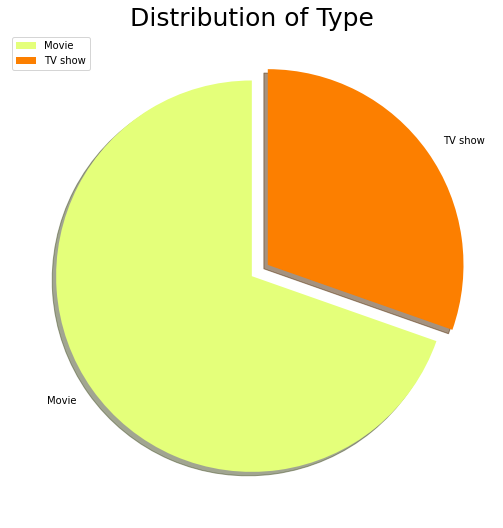

In [ ]:
labels = ['Movie', 'TV show']
size = df1['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

Netflix Displaying value counts of ratings




In [ ]:
df1.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Showing Netflix content in top 5 country wise ratings

Text(0.5, 1.0, 'Top 5 country wise ratings')

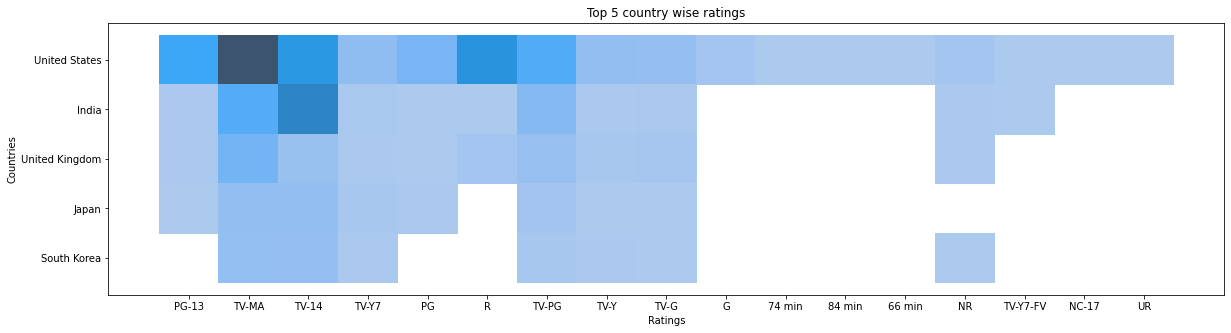

In [ ]:
plt.figure(figsize=(20,5))
top_countries = df1[df1['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'])]
g = sns.histplot(x='rating', y='country', data=top_countries)
g.set_xlabel("Ratings")
g.set_ylabel("Countries")
g.set_title("Top 5 country wise ratings")

How many movies and TV shows are added to Netflix each year?

In [ ]:
df1['release_year'].value_counts().sort_index()

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

top rated director of imdb top 1000 movies

In [ ]:
df3.Director[df3.IMDB_Rating==9.3]

0    Frank Darabont
Name: Director, dtype: object

top rated director of imdb top 1000 movies and his films

In [ ]:
df3[(df3.Director=='Frank Darabont')]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
25,https://m.media-amazon.com/images/M/MV5BMTUxMz...,The Green Mile,1999,A,189,"Crime, Drama, Fantasy",8.6,The lives of guards on Death Row are affected ...,61.0,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,"136,801,374"


disney description word cloud


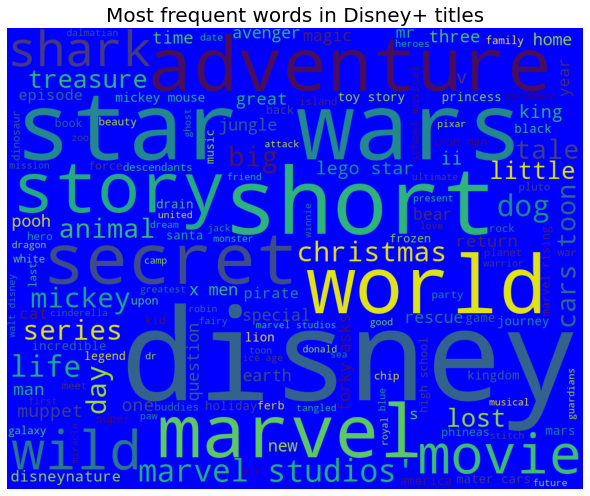

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
comment_words = ''
for line in df2.title:
    words = line.lower().split()
    comment_words += " ".join(words)+" "
wordcloud = WordCloud(width = 1000, height = 800, background_color ='blue', stopwords = stopwords, min_font_size = 15).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Most frequent words in Disney+ titles", fontsize=20)
plt.show()


movies disney released before 1995

In [ ]:
df2[df2['release_year']<1955]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
419,s420,Movie,Trick or Treat,Jack Hannah,NaN,United States,"September 4, 2020",1952,TV-G,9 min,"Animation, Family, Fantasy","Donald plays a trick on his nephews, but a wit..."
518,s519,Movie,Mickey and the Seal,Charles Nichols,NaN,United States,"May 29, 2020",1948,TV-G,7 min,"Animation, Family",Mickey and Pluto get into trouble with a misch...
540,s541,Movie,How to Play Baseball,Jack Kinney,NaN,United States,"May 1, 2020",1942,TV-G,8 min,"Animation, Family, Sports",Goofy teaches you all about this all-American ...
541,s542,Movie,In Beaver Valley,James Algar,Winston Hibler,United States,"May 1, 2020",1950,TV-PG,32 min,"Animals & Nature, Documentary, Family",A young male beaver races to build his new fam...
544,s545,Movie,Nature's Half Acre,James Algar,Winston Hibler,United States,"May 1, 2020",1951,TV-PG,33 min,"Animals & Nature, Documentary, Family",The strange and wonderful world that lies bene...
...,...,...,...,...,...,...,...,...,...,...,...,...
1385,s1386,Movie,Treasure Island,Byron Haskin,"Bobby Driscoll, Robert Newton, Basil Sydney, W...","United Kingdom, United States","November 12, 2019",1950,PG,96 min,"Action-Adventure, Family",The classic tale of a young boy's search for b...
1392,s1393,Movie,Tugboat Mickey,Clyde Geronimi,"Walt Disney, Clarence Nash, Pinto Colvig",United States,"November 12, 2019",1940,TV-G,8 min,"Animation, Comedy, Family",Mickey captains a tugboat with Donald and Goof...
1411,s1412,Movie,Winter Storage,Jack Hannah,NaN,United States,"November 12, 2019",1949,TV-G,7 min,"Animation, Comedy, Family",Donald and Chip and Dale face off over acorns....
1418,s1419,Movie,Ye Olden Days,Bert Gillett,NaN,United States,"November 12, 2019",1933,TV-Y7,9 min,"Animation, Comedy, Family",Minnie is locked away for not marrying a princ...


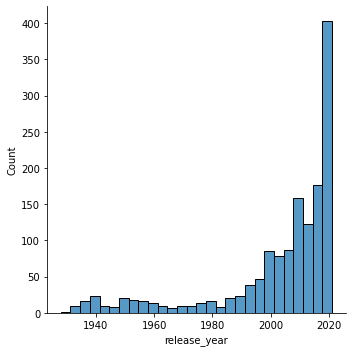

In [ ]:
sns.displot(x = 'release_year', data = df2, palette="hls");

# Top 10 directors with most disney Movies

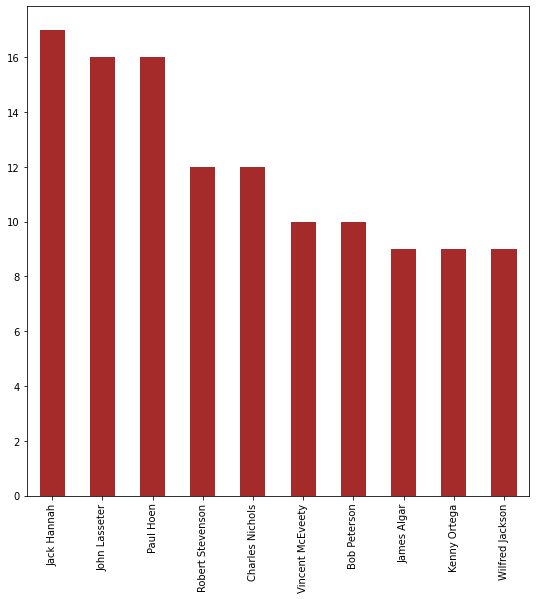

In [ ]:

df2[df2['type'] == 'Movie'].director.value_counts()[:10].plot(kind = 'bar', color = 'brown');

# disney Movie Rating

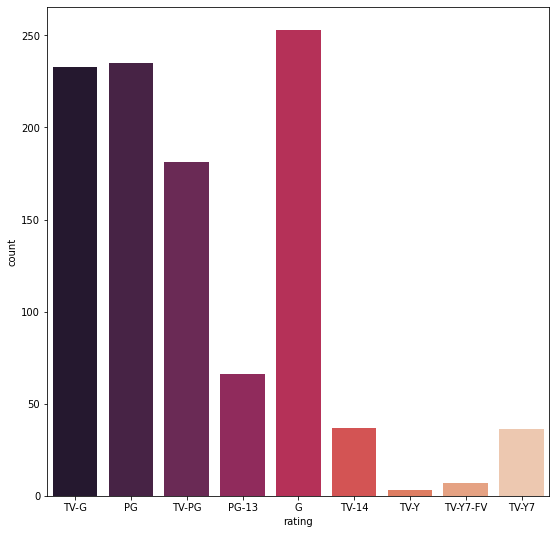

In [ ]:
sns.countplot(x = 'rating', data = df2[df2['type'] == 'Movie'], palette = 'rocket');


# **REGRESSION**

In [ ]:
df3['Gross'] = df3['Gross'].str.replace(',', '')
df3['Gross'] = df3['Gross'].astype('float', errors='ignore')
df3['Gross'].dtype


dtype('float64')

In [ ]:
df3['Gross'].mean()

68034750.87364621

In [ ]:
df3[df3['Gross'].isnull()]['Gross'] = df3['Gross'].mean()
df3.loc[df3[df3['Gross'].isnull()].index, 'Gross'] = df3['Gross'].mean()
df3[df3['Gross'].isnull()]

<ipython-input-11-b6f2fc23b186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[df3['Gross'].isnull()]['Gross'] = df3['Gross'].mean()


In [ ]:
df_train = df3.head(700) # %70 train data#
df_test = df3.tail(300)
x_train = np.array(df_train['Gross']).reshape(-1, 1)
y_train= np.array(df_train['No_of_Votes']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(x_train,y_train)
x_test = np.array(df_test['Gross']).reshape(-1, 1)
y_test = np.array(df_test['No_of_Votes']).reshape(-1, 1)
y_pred = regr.predict(x_test)

In [ ]:
smp = df_test.sample()
smp_x = np.array(smp['Gross']).reshape(-1,1)
smp_y = np.array(smp['No_of_Votes']).reshape(-1,1)
regr = LinearRegression()
regr.fit(x_test,y_test)
y_pred = regr.predict(x_test)
y_pred1 = regr.predict(smp_x).round()
print("Sample's Budget Value =" + str(smp_x))
print("Vote prediction = "  + str(y_pred1))
print("Sample's number of votes " + str(smp_y))
difference =(y_pred1) - (smp_y)
dif =abs(difference).round()
print("Difference between predicted and real value = " + str(dif))

Sample's Budget Value =[[1054361.]]
Vote prediction = [[100907.]]
Sample's number of votes [[28003]]
Difference between predicted and real value = [[72904.]]


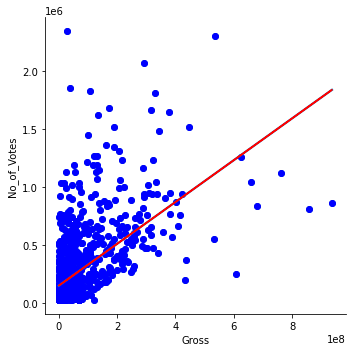

In [ ]:
sns.lmplot(x ="Gross", y ="No_of_Votes", data = df3, order = 1, ci = None)
x_df3 = np.array(df3['Gross']).reshape(-1, 1)
y_df3= np.array(df3['No_of_Votes']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(x_df3,y_df3)
y_pred = regr.predict(x_df3)
plt.scatter(x_df3, y_df3, color ='blue')
plt.plot(x_df3, y_pred, color ='red')
plt.show()

## **VISUALIZATION**

Text(0.5, 1.0, 'TV shows count heatmap')

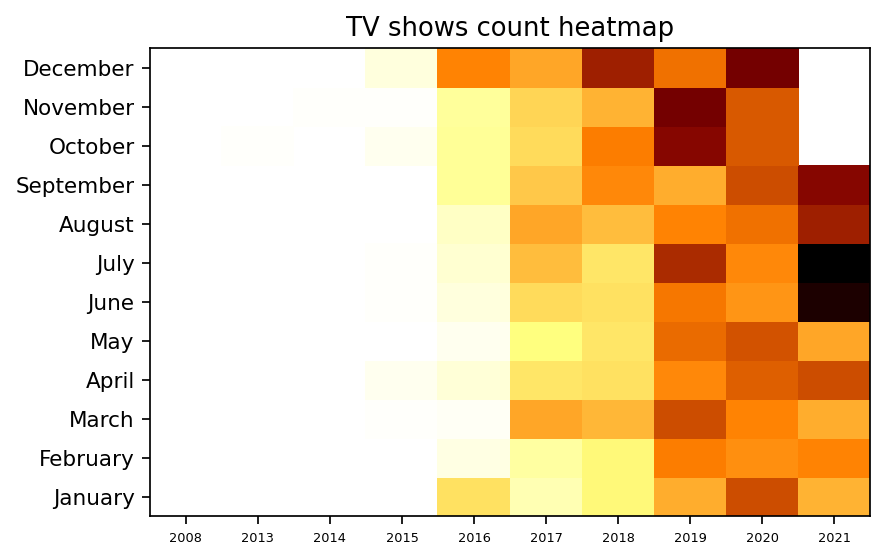

In [ ]:
df_watch=df1[df1['type']=='TV Show']
df_time = df_watch[['date_added']].dropna()
df_time['year'] = df_time['date_added'].apply(lambda x : x.split(', ')[-1])
df_time['month'] = df_time['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = df_time.groupby('year')['month'].value_counts().unstack()[list].T
plt.figure(figsize=(6, 4), dpi=155)
plt.pcolor(df, cmap='afmhot_r')
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=6)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('TV shows count heatmap')

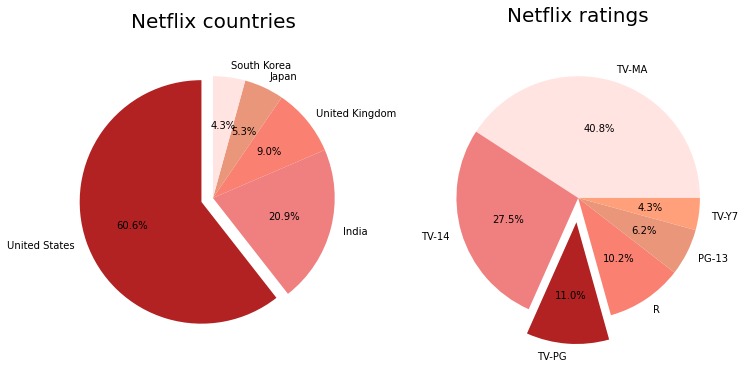

In [ ]:
#Choose the first X values, then reset the index of the DataFrame, and use the default one instead.
place=df1.country.value_counts()[:5].reset_index()
place.columns=['countries','count']
rating=df1.rating.value_counts()[:6].reset_index()
rating.columns=['ratings','count']

fig=plt.figure(figsize=(12,6))

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])



ax0.text(-0,1.4,"Netflix countries",fontsize=20, ha='center')
ax1.text(-0,1.45,"Netflix ratings",fontsize=20, ha='center')

ax0.pie(place['count'], explode=[0.1,0,0,0,0],labels=place.countries, autopct='%1.1f%%', startangle=90,colors=colormap1)

ax1.pie(rating['count'], explode=[0,0,0.2,0,0,0],labels=rating.ratings, autopct='%1.1f%%',colors=colormap2)


plt.show()

In [35]:
#Group by countries, count them and choose the largest ten
df1.groupby("country").size().sort_values().nlargest(10).index
#Repeat the process but with fewer largest
placeholder = df1.groupby('country').size().sort_values().nlargest(5).index.tolist()
df_6 = df1.loc[df1['country'].isin(placeholder)]
df_6_upd = df_6.groupby("release_year")['country'].value_counts().reset_index(name='counts')
fig = px.line(df_6_upd, x="release_year", y="counts", color='country',
#Pick title
title='Movie production over the years', markers=True)
#Call the visualization
fig.update_layout(xaxis_title="Year",yaxis_title="Number of content",legend_title='Country')

In [36]:
#Relate the durations with the season values
sez = df1.loc[df1['type'] == 'TV Show']
sez['duration'] = sez['duration'].str.replace(' Seasons', ' Season')
sez['duration'] = sez['duration'].str.replace(' Season', ' Season(s)')
#Choose colors with ploty express and set the visualization as piece chart
fig = px.pie(df_7, values='Number of TV Show', names='duration', color_discrete_sequence=px.colors.sequential.RdBu, title='Netflix shows total seasons')
fig.update_traces(textposition='inside', textinfo='percent+label')
#We can ignore the warning

<ipython-input-36-68148c17dd7f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-68148c17dd7f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Movie count over the past years')

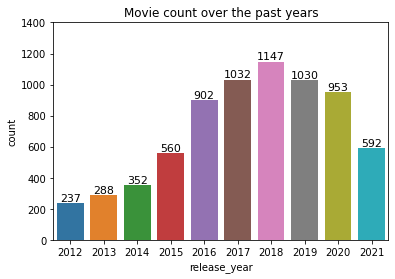

In [ ]:
df1
date = df1[df1.release_year >= 2012]
sns.countplot(x='release_year',data=date)
#acquire the current Axes instance on the figure 
ax = plt.gca()
#set the values
ax.set_ylim([0,1400])
# use ax.patches for accessing the subplots in mathplotlib, set the width and height by Python syntax and use conversion
#if necessary
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=11, ha='center', va='bottom')
plt.title('Movie count over the past years') 

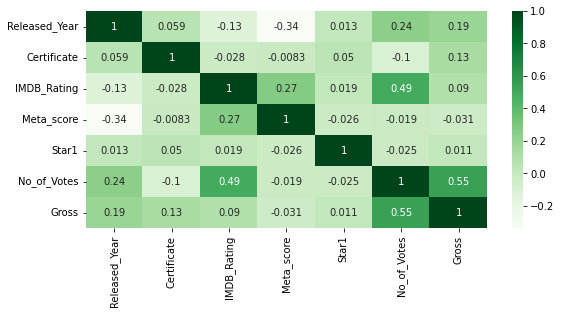

In [ ]:
#Go through each attribute individually, starting with the Release Year. Check it's numerical status first
df3[~df3.Released_Year.astype(str).str.isnumeric()]
#Define the release year
df3.loc[966,'Released_Year']=2000
#The more complex date format configuration
df3['Released_Year'] = pd.to_datetime(df3['Released_Year'], format="%Y").dt.year
df3['Certificate'] = lbl.fit_transform(df3['Certificate'])
df3['Certificate'].fillna("unknown",inplace=True)
df3['Star1'] = lbl.fit_transform(df3['Star1'])
fig, ax = plt.subplots(figsize=(9,4))
#Call the heatmap
sns.heatmap(df3.corr(), annot=True, cmap='Greens');

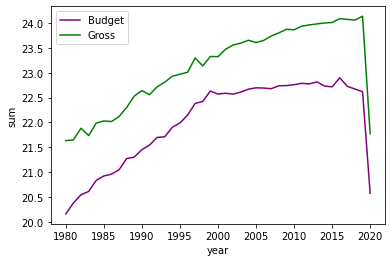

In [ ]:
#a quite simple graph, first pick out the 4 required columns
new_df = df4.groupby(df4['year']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'], 'name': ['count']})
#define the logarithmic lines
greenline = np.log(new_df['budget']['sum'])
purpleline = np.log(new_df['gross']['sum'])
#exercise mathplot
sns.lineplot(data=new_df, x='year', y=greenline, color='purple')
sns.lineplot(data=new_df, x='year', y=purpleline, color="green")
plt.legend(labels=["Budget","Gross"])

Text(0.5, 0, 'Rating')

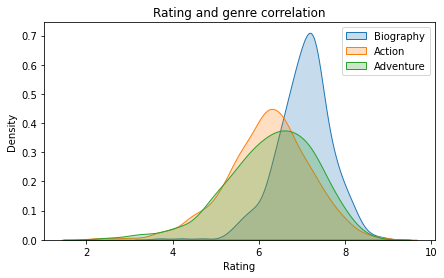

In [ ]:
#determine the plot's size
plt.figure(figsize=(7, 4))
#call seaborn function kdeplot to visualize a histogram 
for genre in ['Biography', 'Action', 'Adventure']: sns.kdeplot(df4[df4.score.notnull() & (df4.genre == genre)].score, fill=True, label=genre)
plt.legend()
plt.title('Rating and genre correlation')
plt.xlabel('Rating')

Text(0.5, 1.0, 'Top Earning Companies')

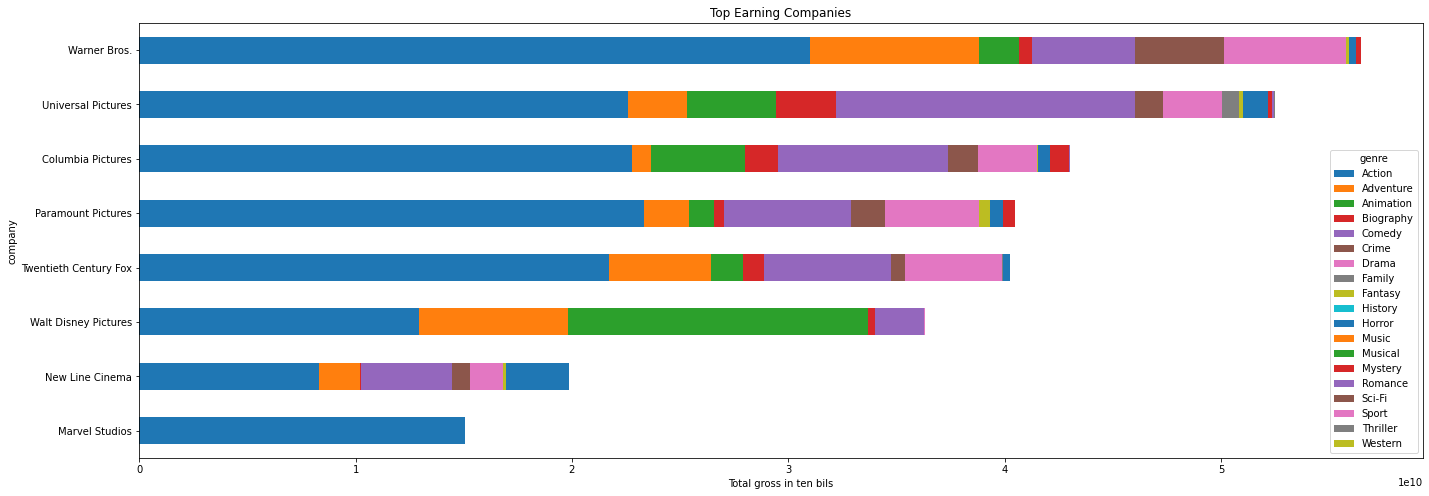

In [ ]:
#redefine the dataset into companies and their gross by genre
stacked = df4.groupby(['company','genre'], as_index=False)['gross'].sum().pivot(index='company',columns='genre', values='gross')
total = stacked.sum(axis=1)
stacked['gross_sum'] = total
#define the graph and sort it by ascending
cm = stacked.sort_values(by='gross_sum', ascending = False).head(8)
cm.sort_values(by='gross_sum', ascending =True, inplace=True)
cm.drop('gross_sum', axis=1, inplace=True)
#visualize the company gross in a bar shape
cm.plot(kind='barh', stacked=True, figsize=(23,8))
#label and call the plot
plt.xlabel("Total gross in ten bils")
plt.title('Top Earning Companies')